In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score
from sklearn import tree

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


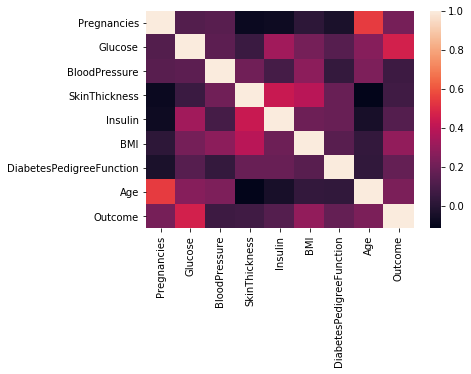

In [6]:
sns.heatmap(data.corr())

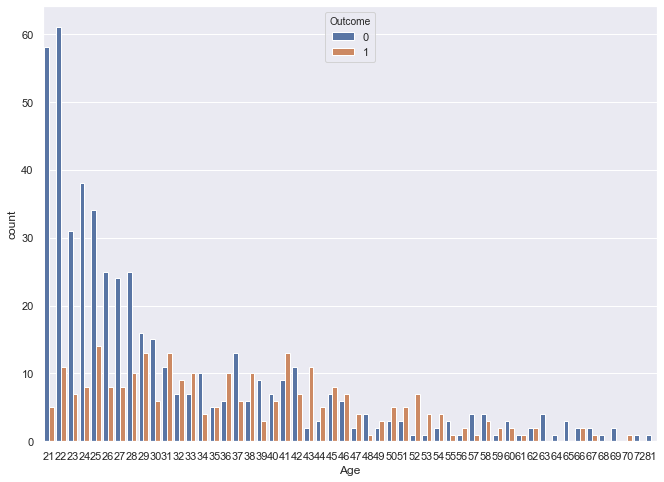

In [7]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="Age",hue="Outcome",data=data)

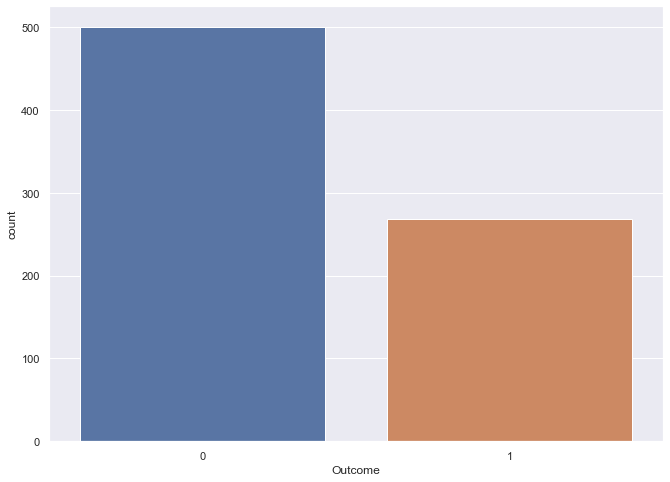

In [8]:
sns.countplot(data['Outcome'])

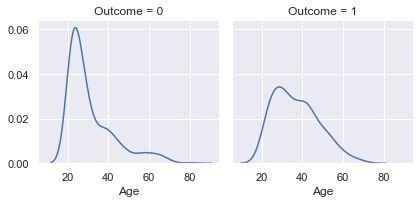

In [9]:
g = sns.FacetGrid(data, col='Outcome')
g = g.map(sns.kdeplot, 'Age')

In [10]:
zero_not_accepted = ['BloodPressure','Insulin','Age']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [11]:
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=91)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
dec_model=DecisionTreeClassifier(max_leaf_nodes=25,random_state=91)
parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4],
              'criteria':'information-gain'
}

In [15]:
dec_model = DecisionTreeClassifier(max_depth = 6, max_features = 5, 
                               min_samples_split = 4,
                               random_state=91)

In [17]:
dec_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=91, splitter='best')

In [18]:
y_preds=dec_model.predict(X_test)

In [19]:
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [20]:
y_test

98     0
739    1
741    0
16     1
659    1
      ..
117    0
486    0
646    1
401    0
576    0
Name: Outcome, Length: 192, dtype: int64

In [21]:
cm = confusion_matrix(y_test,y_preds)
print(cm)
print(f1_score(y_test,y_preds))
print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))

[[103  28]
 [ 20  41]]
0.6307692307692307
TP - True Negative 103
FP - False Positive 28
FN - False Negative 20
TP - True Positive 41


In [22]:
print(accuracy_score(y_test,y_preds)*100)

75.0


In [23]:
dec_model.score(X_train,y_train)

0.8697916666666666

In [24]:
dec_model.score(X_test,y_test)

0.75

In [26]:
decision_tree=tree.export_graphviz(dec_model, out_file="dia.dot", max_depth=3, label='all',filled=True,impurity=True,precision=3)

In [27]:
!dot -Tpng dia.dot -o dia.png

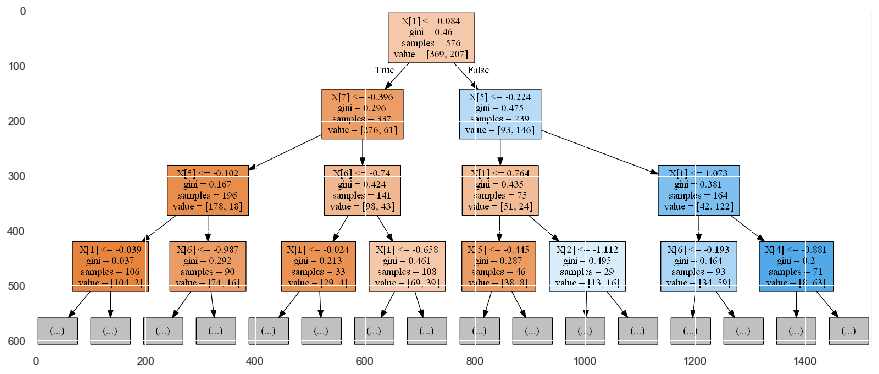

In [28]:
image=plt.imread('dia.png')
plt.figure(figsize=(15,15))
plt.imshow(image)
